In [1]:
#============================ 🌳 GREEN AREAS ANALYSIS 🌳 ============================
import pandas as pd

path_csv="2015-street-tree-census-tree-data.csv"

df = pd.read_csv(path_csv)

df.shape

df.head()

print(df.columns)

df["borough"].isna().sum()

tree_ny = df["borough"].value_counts()

print(tree_ny)

# Convert Series to DataFrame
tree_ny_df = tree_ny.reset_index()
tree_ny_df.columns = ['borough', 'tree_count']
tree_ny_df['borough'] = tree_ny_df['borough'].str.upper()

print(tree_ny_df)

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')
borough
Queens           250551
Brooklyn         177293
Staten Island    105318
Bronx             85203
Manhattan         65423
Name: count, dtype: int64
         borough  tree_count
0         QUEENS      250551
1       BROOKLYN      177293
2  STATEN ISLAND      105318
3          BRONX       85203
4      MANHATTAN       65423


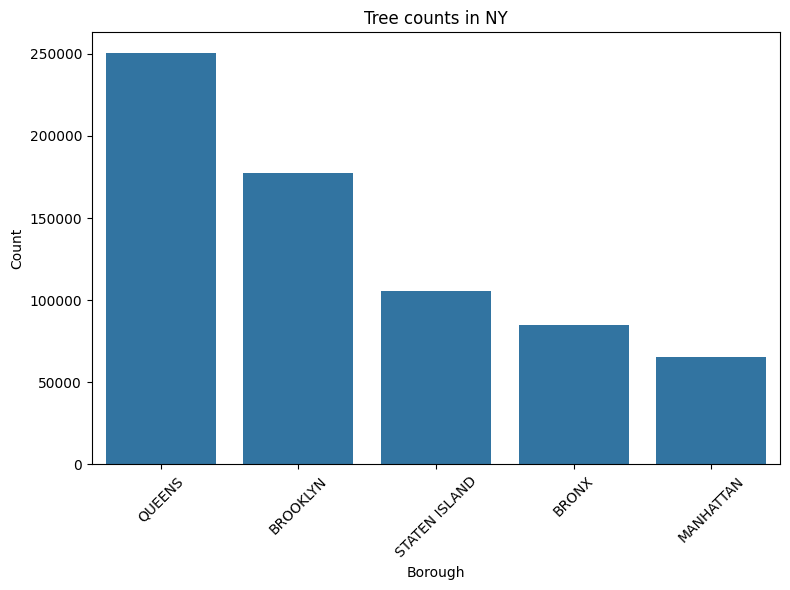

In [2]:
#============================ 📊 VISUALIZATION 📊 ==========================

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.barplot(data=tree_ny_df, x='borough', y='tree_count')
plt.title("Tree counts in NY")
plt.ylabel("Count")
plt.xlabel("Borough")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [3]:
#============================ 🔊 NOISE POLLUTION ANALYSIS 🔊 ============================

path_noise = "Noise_complaint_mass.csv"

dfn = pd.read_csv(path_noise)

print(dfn.shape)

dfn.head()

dfn["Borough"].isna().sum()

noise_ny = dfn["Borough"].value_counts()

print(noise_ny)

# Remove rows where Borough is "Unspecified"
dfn = dfn[dfn["Borough"] != "Unspecified"]

print(f"Shape after removing Unspecified: {dfn.shape}")
noise_ny = dfn["Borough"].value_counts()

noise_ny_df = noise_ny.reset_index()
noise_ny_df.columns = ['borough', 'noise_count']

print(noise_ny_df)

(2440, 4)
Borough
MANHATTAN        1076
BROOKLYN          736
QUEENS            418
BRONX             141
STATEN ISLAND      64
Unspecified         5
Name: count, dtype: int64
Shape after removing Unspecified: (2435, 4)
         borough  noise_count
0      MANHATTAN         1076
1       BROOKLYN          736
2         QUEENS          418
3          BRONX          141
4  STATEN ISLAND           64


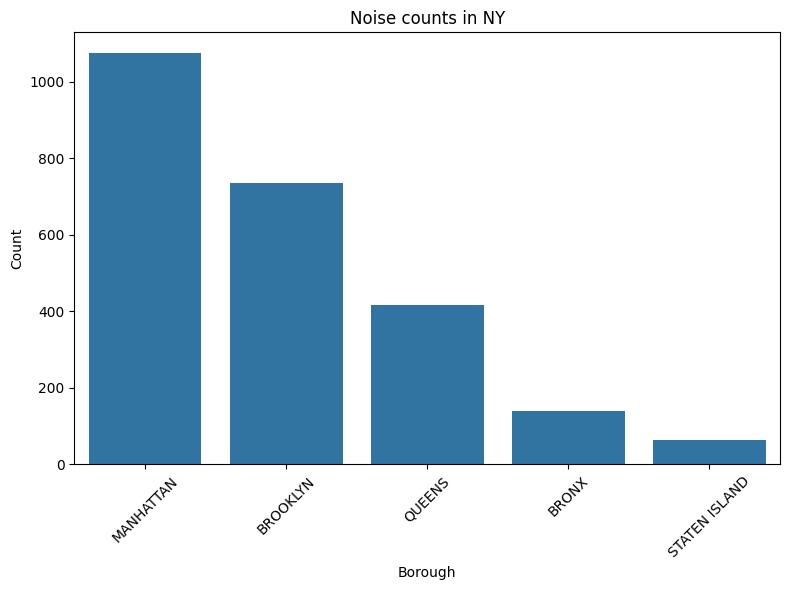

In [4]:
#============================ 📊 VISUALIZATION 📊 ========================
plt.figure(figsize=(8,6))
sns.barplot(data=noise_ny_df, x='borough', y='noise_count')
plt.title("Noise counts in NY")
plt.ylabel("Count")
plt.xlabel("Borough")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
#============================ 🚗 TRAFFIC VOLUME ANALYSIS 🚗 ==========================

path_traffic = "Automated_Traffic_Volume_Counts_20250420.csv"

dft = pd.read_csv(path_traffic)

print(dft.shape)

dft.head()

dft["Boro"].isna().sum()

traffic_ny = dft["Boro"].value_counts()

traffic_ny

# Calculate mean values for each year (Yr) grouped by each borough (Boro)
# First, let's see what columns contain numeric data
print("Columns in dft:")
print(dft.columns.tolist())
print("\nData types:")
print(dft.dtypes)

# Calculate mean values by Boro and Yr
# Assuming we want to calculate mean of numeric columns (like traffic volume)

# Get numeric columns only (excluding Boro and Yr which are grouping variables)
#numeric_cols = dft.select_dtypes(include=['number']).columns.tolist()
#print(f"Numeric columns found: {numeric_cols}")

# Group by Boro and Yr, then calculate mean
yearly_boro_means = dft.groupby(['Boro', 'Yr'])["Vol"].mean()

print(f"\nMean values by Borough and Year:")
#print(f"Shape: {yearly_boro_means.shape}")
yearly_boro_means.head(10)

yearly_boro_means.to_csv("traffic_yearly.csv")

# Remove multiple years using a list
years_to_drop = [2000, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,2017, 2018, 2019]  # Add any years you want to exclude

yearly_boro_means_filtered_multiple = yearly_boro_means[~yearly_boro_means.index.get_level_values('Yr').isin(years_to_drop)]

print(f"Dropping years: {years_to_drop}")
print(f"Original shape: {yearly_boro_means.shape}")
print(f"Years remaining: {sorted(yearly_boro_means_filtered_multiple.index.get_level_values('Yr').unique())}")
yearly_boro_means_filtered_multiple.head(10)



(1712605, 14)
Columns in dft:
['RequestID', 'Boro', 'Yr', 'M', 'D', 'HH', 'MM', 'Vol', 'SegmentID', 'WktGeom', 'street', 'fromSt', 'toSt', 'Direction']

Data types:
RequestID     int64
Boro         object
Yr            int64
M             int64
D             int64
HH            int64
MM            int64
Vol           int64
SegmentID     int64
WktGeom      object
street       object
fromSt       object
toSt         object
Direction    object
dtype: object

Mean values by Borough and Year:
Dropping years: [2000, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
Original shape: (92,)
Years remaining: [2020, 2021, 2022, 2023, 2024]


Boro      Yr  
Bronx     2020     86.477759
          2021     54.392698
          2022     72.851356
          2023    100.423382
          2024     46.528695
Brooklyn  2020     79.548800
          2021    144.310433
          2022     86.561837
          2023    168.578995
          2024     84.205367
Name: Vol, dtype: float64

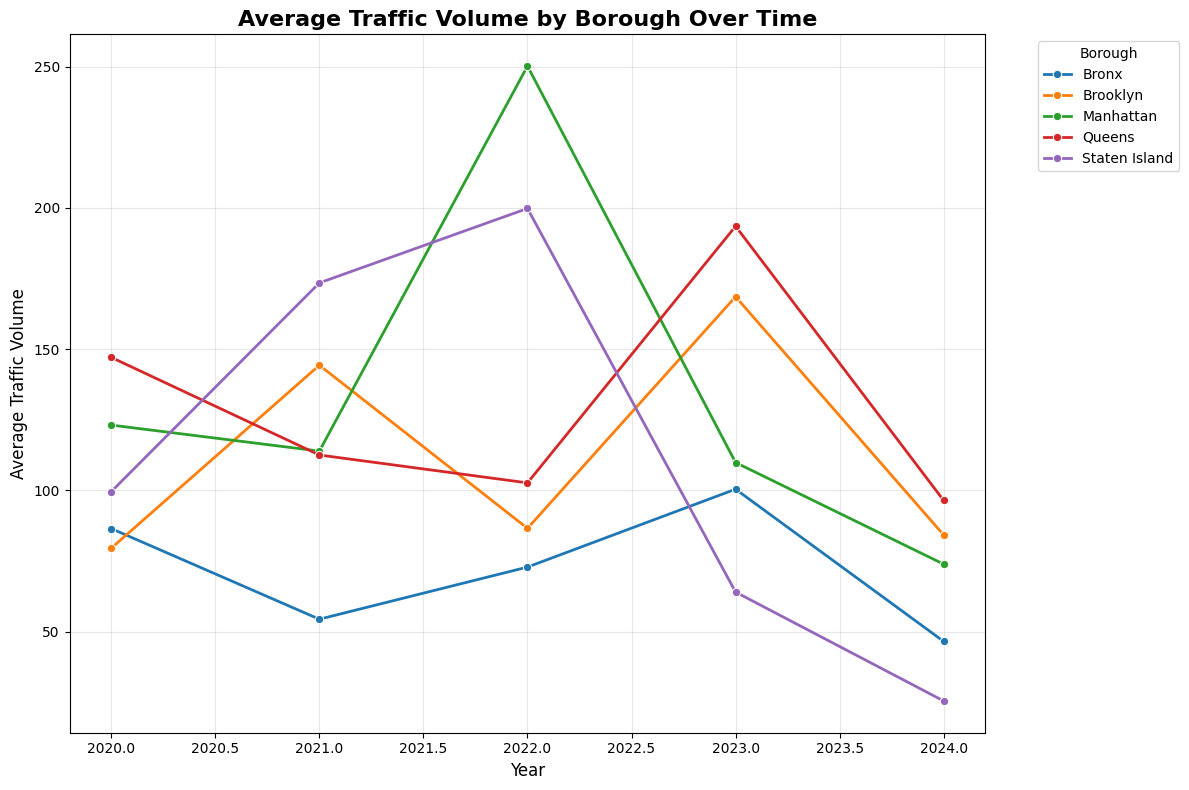

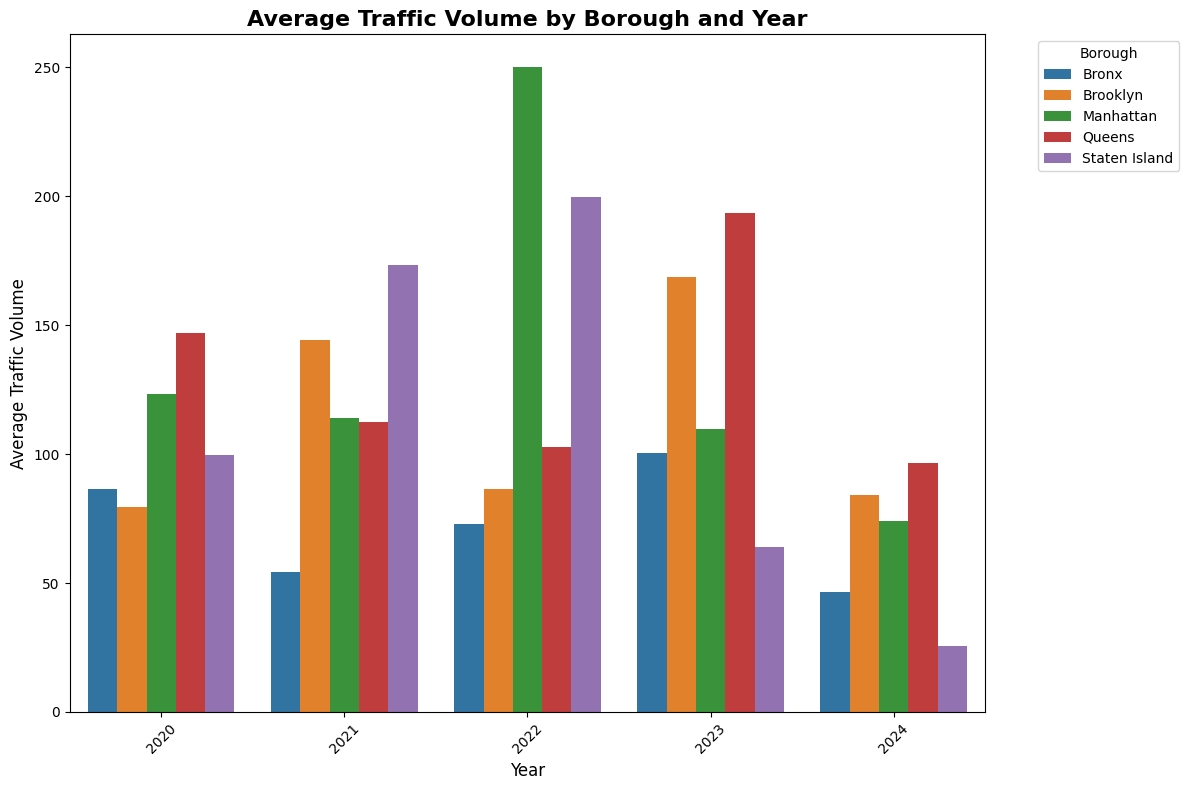

In [6]:
#============================ 📊 VISUALIZATION 📊 ========================

# Convert MultiIndex Series to DataFrame for easier plotting
traffic_df = yearly_boro_means_filtered_multiple.reset_index()
traffic_df.columns = ['Borough', 'Year', 'Mean_Volume']
traffic_df=traffic_df.rename(columns={"Borough":"borough"})

# Create line plot showing trends over time by borough
plt.figure(figsize=(12, 8))
sns.lineplot(data=traffic_df, x='Year', y='Mean_Volume', hue='borough', marker='o', linewidth=2)
plt.title('Average Traffic Volume by Borough Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Traffic Volume', fontsize=12)
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Also create a bar plot for comparison
plt.figure(figsize=(12, 8))
sns.barplot(data=traffic_df, x='Year', y='Mean_Volume', hue='borough')
plt.title('Average Traffic Volume by Borough and Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Traffic Volume', fontsize=12)
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Mean traffic volume by Borough:
Boro
Bronx             72.134778
Brooklyn         112.641087
Manhattan        134.200420
Queens           130.446396
Staten Island    112.458627
Name: Vol, dtype: float64


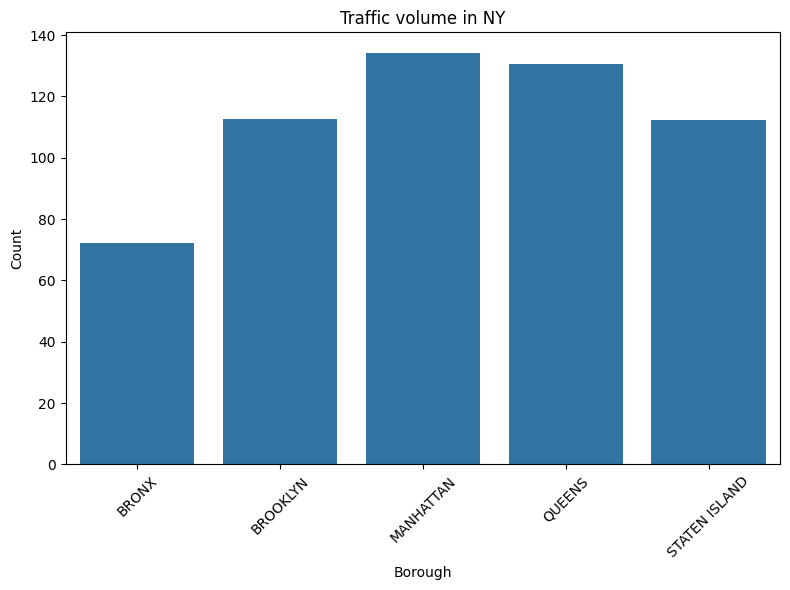

In [24]:
# Correct ways to calculate means from the MultiIndex Series

# Option 1: Overall mean of all values
#overall_mean = yearly_boro_means_filtered_multiple.mean()
#print(f"Overall mean traffic volume: {overall_mean}")

# Option 2: Mean by Borough (group by first level of index)
mean_by_borough = yearly_boro_means_filtered_multiple.groupby('Boro').mean()
print(f"\nMean traffic volume by Borough:")
print(mean_by_borough)

# Option 3: Mean by Year (group by second level of index)
#mean_by_year = yearly_boro_means_filtered_multiple.groupby('Yr').mean()
#print(f"\nMean traffic volume by Year:")
#print(mean_by_year)

#============================ 📊 VISUALIZATION 📊 ======================
traffic_mean_df = mean_by_borough.reset_index()
traffic_mean_df.columns = ['borough', "traffic_volume"]
traffic_mean_df['borough'] = traffic_mean_df['borough'].str.upper()

plt.figure(figsize=(8,6))
sns.barplot(data=traffic_mean_df, x='borough',y="traffic_volume")
plt.title("Traffic volume in NY")
plt.ylabel("Count")
plt.xlabel("Borough")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Accessing and Analyzing Data from the API

First, the API was accessed to retrieve the available measurement data. Then, the different locations and the operating time of the sensors within New York City were analyzed.  

It is worth noting that, since this API provides real-time measurements, accessing the data was somewhat challenging due to the dynamic and constantly changing nature of the information.


In [7]:
import requests

url = "https://api.openaq.org/v3/locations/2178"
headers = {
    "X-API-Key": "5639e7839da0fe184a5f50e92bc33a48cd4570469031066036957d3b155daf8c" #Insert here your API key
}

response = requests.get(url, headers=headers)

print(response.status_code)
print(response.json())

200
{'meta': {'name': 'openaq-api', 'website': '/', 'page': 1, 'limit': 100, 'found': 1}, 'results': [{'id': 2178, 'name': 'Del Norte', 'locality': 'Albuquerque', 'timezone': 'America/Denver', 'country': {'id': 155, 'code': 'US', 'name': 'United States'}, 'owner': {'id': 4, 'name': 'Unknown Governmental Organization'}, 'provider': {'id': 119, 'name': 'AirNow'}, 'isMobile': False, 'isMonitor': True, 'instruments': [{'id': 2, 'name': 'Government Monitor'}], 'sensors': [{'id': 25227, 'name': 'co ppm', 'parameter': {'id': 8, 'name': 'co', 'units': 'ppm', 'displayName': 'CO'}}, {'id': 4272226, 'name': 'no ppm', 'parameter': {'id': 35, 'name': 'no', 'units': 'ppm', 'displayName': 'NO'}}, {'id': 3916, 'name': 'no2 ppm', 'parameter': {'id': 7, 'name': 'no2', 'units': 'ppm', 'displayName': 'NO₂'}}, {'id': 4272103, 'name': 'nox ppm', 'parameter': {'id': 19840, 'name': 'nox', 'units': 'ppm', 'displayName': 'NOx'}}, {'id': 3917, 'name': 'o3 ppm', 'parameter': {'id': 10, 'name': 'o3', 'units': 'ppm

In [8]:
import requests

API_KEY = "5639e7839da0fe184a5f50e92bc33a48cd4570469031066036957d3b155daf8c"  #Insert here your API key
BASE_URL = "https://api.openaq.org/v3"
HEADERS = {"X-API-Key": API_KEY}

params = {
    "bbox": "-74.268196,40.489402,-73.691714,40.921195",
    "limit": 100,
    "page": 1,
}

r = requests.get(f"{BASE_URL}/locations", headers=HEADERS, params=params)
data = r.json()
print(f"📍Found {data['meta']["found"]} locations.")
data["results"][0]

📍Found 55 locations.


{'id': 384,
 'name': 'CCNY',
 'locality': 'New York-Northern New Jersey-Long Island',
 'timezone': 'America/New_York',
 'country': {'id': 155, 'code': 'US', 'name': 'United States'},
 'owner': {'id': 4, 'name': 'Unknown Governmental Organization'},
 'provider': {'id': 119, 'name': 'AirNow'},
 'isMobile': False,
 'isMonitor': True,
 'instruments': [{'id': 2, 'name': 'Government Monitor'}],
 'sensors': [{'id': 671,
   'name': 'o3 ppm',
   'parameter': {'id': 10, 'name': 'o3', 'units': 'ppm', 'displayName': 'O₃'}},
  {'id': 673,
   'name': 'pm25 µg/m³',
   'parameter': {'id': 2,
    'name': 'pm25',
    'units': 'µg/m³',
    'displayName': 'PM2.5'}}],
 'coordinates': {'latitude': 40.8197, 'longitude': -73.9481},
 'licenses': [{'id': 33,
   'name': 'US Public Domain',
   'attribution': {'name': 'Unknown Governmental Organization', 'url': None},
   'dateFrom': '2016-01-30',
   'dateTo': None}],
 'bounds': [-73.9481, 40.8197, -73.9481, 40.8197],
 'distance': None,
 'datetimeFirst': {'utc': '2

In [9]:
#For each location where a sensor is active, checking when did it first and last start retrieving air quality data

import requests

API_KEY = "5639e7839da0fe184a5f50e92bc33a48cd4570469031066036957d3b155daf8c"  #Insert here your API key
BASE_URL = "https://api.openaq.org/v3"
HEADERS = {"X-API-Key": API_KEY}

bbox = [-74.25909, 40.477399, -73.70018, 40.917577]
url = f"{BASE_URL}/locations"
params = {"bbox": ",".join(map(str, bbox)), "limit": 1000}
resp = requests.get(url, headers=HEADERS, params=params)
resp.raise_for_status()

for loc in resp.json()["results"]:
    print(
        f"{loc['name']:<40} "
        f"First: {loc['datetimeFirst']['utc']}  "
        f"Last: {loc['datetimeLast']['utc']}"
    )

CCNY                                     First: 2016-03-12T09:00:00Z  Last: 2025-10-20T15:00:00Z
Susan Wagner                             First: 2016-03-25T04:00:00Z  Last: 2017-11-15T22:00:00Z
Manhattan/IS143                          First: 2016-03-10T08:00:00Z  Last: 2025-10-20T15:00:00Z
Bronx - IS52                             First: 2016-03-10T08:00:00Z  Last: 2025-10-20T15:00:00Z
Maspeth                                  First: 2016-03-10T08:00:00Z  Last: 2025-10-20T15:00:00Z
Queens                                   First: 2016-03-10T08:00:00Z  Last: 2025-10-16T19:00:00Z
PS 19                                    First: 2016-03-10T08:00:00Z  Last: 2017-12-18T10:00:00Z
Bklyn - PS 314                           First: 2016-03-10T08:00:00Z  Last: 2025-10-20T15:00:00Z
Division Street                          First: 2016-03-10T08:00:00Z  Last: 2020-02-19T16:00:00Z
Bklyn - PS274                            First: 2016-03-10T08:00:00Z  Last: 2025-10-20T15:00:00Z
Bronx - IS74                  

Tried to extract all data for all pollutants at once, and the API crashed. I got a 429 error for "Too many requests", and decided to run the same block of code for each pollutant individually: PM2.5, PM10 and PM1 

We decided to analyse only PM2.5, PM10, PM1 since we didn't have consistent data for the other pollutants. 

In [10]:
#========== Extracting data for PM2.5 and collecting it into a csv file ============

# 1) Define NYC bounding box 🌆

BBOX = [-74.25909, 40.477399, -73.70018, 40.917577]
DATE_FROM = "2024-01-01T00:00:00Z"
DATE_TO   = "2024-12-31T23:59:59Z"

# 2) Get all locations in NYC
print("Fetching NYC locations...")
resp = requests.get(
    f"{BASE_URL}/locations",
    headers=HEADERS,
    params={"bbox": ",".join(map(str, BBOX)), "limit": 1000}
)
locations = resp.json().get("results", [])
print(f"📍Found {len(locations)} locations")

# 3) Extract PM2.5 sensors only
pm25_sensors = []
for loc in locations:
    for s in loc.get("sensors", []):
        if s["parameter"]["name"].lower() == "pm25":
            pm25_sensors.append({
                "sensor_id": s["id"],
                "location_name": loc["name"]
            })

print(f"Found {len(pm25_sensors)} PM2.5 sensors")

# 4) Get hourly PM2.5 data
rows = []
for s in pm25_sensors:
    url = f"{BASE_URL}/sensors/{s['sensor_id']}/measurements"
    params = {"date_from": DATE_FROM, "date_to": DATE_TO, "limit": 1000}
    r = requests.get(url, headers=HEADERS, params=params)
    if r.status_code == 200:
        for m in r.json().get("results", []):
            rows.append({
                "sensor_id": s["sensor_id"],
                "location_name": s["location_name"],
                "datetime_utc": (m.get("datetime", {}).get("utc") or m.get("date", {}).get("utc") or (m.get("period", {}).get("datetimeFrom", {}).get("utc") if m.get("period") else None)),
                "value": m.get("value")
            })
    print(f"Fetched data for {s['location_name']}")

# 5) Save everything
df = pd.DataFrame(rows)
df.to_csv("nyc_pm25_2024.csv", index=False)
print(f"Saved {len(df)} records to nyc_pm25_2024.csv")
df.head()

Fetching NYC locations...
📍Found 54 locations
Found 48 PM2.5 sensors
Fetched data for CCNY
Fetched data for Manhattan/IS143
Fetched data for Bronx - IS52
Fetched data for Maspeth
Fetched data for Queens
Fetched data for PS 19
Fetched data for Bklyn - PS 314
Fetched data for Division Street
Fetched data for Bklyn - PS274
Fetched data for Bronx - IS74
Fetched data for Fort Lee Near Road
Fetched data for Jersey City FH
Fetched data for Elizabeth Trailer
Fetched data for Newark Firehouse
Fetched data for Queens Near-road
Fetched data for Morrisania
Fetched data for Union City High Scho
Fetched data for Port Richmond
Fetched data for Franklin Avenue
Fetched data for Bayside, NY
Fetched data for State Dept of Environmental Conservation
Fetched data for Bayside, NY
Fetched data for Jersey City Heights
Fetched data for Jersey City Heights
Fetched data for Carteret, NJ
Fetched data for State Dept of Environmental Conservation
Fetched data for State Dept of Environmental Conservation
Fetched dat

,sensor_id,location_name,datetime_utc,value
0,673,CCNY,2016-03-12T08:00:00Z,2.4
1,673,CCNY,2016-03-26T15:00:00Z,2.4
2,673,CCNY,2016-03-31T13:00:00Z,8.9
3,673,CCNY,2016-03-31T16:00:00Z,8.2
4,673,CCNY,2016-04-01T04:00:00Z,12.7


In [11]:
# ========== Extracting data for PM10 and collecting it into a csv file ============

# 1) Define NYC bounding box
BBOX = [-74.25909, 40.477399, -73.70018, 40.917577]
DATE_FROM = "2024-01-01T00:00:00Z"
DATE_TO   = "2024-12-31T23:59:59Z"

# 2) Get all locations in NYC
print("Fetching NYC locations...")
resp = requests.get(
    f"{BASE_URL}/locations",
    headers=HEADERS,
    params={"bbox": ",".join(map(str, BBOX)), "limit": 1000}
)
locations = resp.json().get("results", [])
print(f"Found {len(locations)} locations")

# 3) Extract PM10 sensors only
pm10_sensors = []
for loc in locations:
    for s in loc.get("sensors", []):
        if s["parameter"]["name"].lower() == "pm10":
            pm10_sensors.append({
                "sensor_id": s["id"],
                "location_name": loc["name"]
            })
print(f"Found {len(pm10_sensors)} PM10 sensors")

# 4) Get hourly PM10 data
rows = []
for s in pm10_sensors:
    url = f"{BASE_URL}/sensors/{s['sensor_id']}/measurements"
    params = {"date_from": DATE_FROM, "date_to": DATE_TO, "limit": 1000}
    r = requests.get(url, headers=HEADERS, params=params)
    if r.status_code == 200:
        for m in r.json().get("results", []):
            rows.append({
                "sensor_id": s["sensor_id"],
                "location_name": s["location_name"],
                "datetime_utc": (m.get("datetime", {}).get("utc") or m.get("date", {}).get("utc") or (m.get("period", {}).get("datetimeFrom", {}).get("utc") if m.get("period") else None)),
                "value": m.get("value")
            })
    print(f"Fetched data for {s['location_name']}")

# 5) Save everything
df = pd.DataFrame(rows)
df.to_csv("nyc_pm10_2024.csv", index=False)
print(f"Saved {len(df)} records to nyc_pm10_2024.csv")
df.head()

Fetching NYC locations...
Found 54 locations
Found 19 PM10 sensors
Fetched data for Bronx - IS52
Fetched data for State Dept of Environmental Conservation
Fetched data for State Dept of Environmental Conservation
Fetched data for Bayside, NY
Fetched data for Bayside, NY
Fetched data for Jersey City Heights
Fetched data for Jersey City Heights
Fetched data for Carteret, NJ
Fetched data for Carteret, NJ
Fetched data for State Dept of Environmental Conservation
Fetched data for State Dept of Environmental Conservation
Fetched data for State Dept of Environmental Conservation
Fetched data for State Dept of Environmental Conservation
Fetched data for 7th Ave and W 16th St
Fetched data for Win Son
Fetched data for Near Bay 50 St
Fetched data for Montclair, NJ
Fetched data for Hillcrest, NY
Fetched data for Downtown Montclair
Saved 13032 records to nyc_pm10_2024.csv


,sensor_id,location_name,datetime_utc,value
0,1099,Bronx - IS52,2016-03-10T07:00:00Z,21.0
1,1099,Bronx - IS52,2016-03-10T08:00:00Z,22.0
2,1099,Bronx - IS52,2016-03-11T15:00:00Z,14.0
3,1099,Bronx - IS52,2016-03-11T16:00:00Z,13.0
4,1099,Bronx - IS52,2016-03-11T17:00:00Z,2.0


In [12]:
# ========== Extracting data for PM1 and collecting it into a csv file ============

# 1) Define NYC bounding box
BBOX = [-74.25909, 40.477399, -73.70018, 40.917577]
DATE_FROM = "2024-01-01T00:00:00Z"
DATE_TO   = "2024-12-31T23:59:59Z"

# 2) Get all locations in NYC area
print("Fetching NYC locations...")
resp = requests.get(
    f"{BASE_URL}/locations",
    headers=HEADERS,
    params={"bbox": ",".join(map(str, BBOX)), "limit": 1000}
)
locations = resp.json().get("results", [])
print(f"Found {len(locations)} locations")

# 3) Extract PM1 sensors only
pm1_sensors = []
for loc in locations:
    for s in loc.get("sensors", []):
        if s["parameter"]["name"].lower() == "pm1":
            pm1_sensors.append({
                "sensor_id": s["id"],
                "location_name": loc["name"]
            })
print(f"Found {len(pm1_sensors)} PM1 sensors")

# 4) Get hourly PM1 data
rows = []
for s in pm1_sensors:
    url = f"{BASE_URL}/sensors/{s['sensor_id']}/measurements"
    params = {"date_from": DATE_FROM, "date_to": DATE_TO, "limit": 1000}
    r = requests.get(url, headers=HEADERS, params=params)
    if r.status_code == 200:
        for m in r.json().get("results", []):
            rows.append({
                "sensor_id": s["sensor_id"],
                "location_name": s["location_name"],
                "datetime_utc": (m.get("datetime", {}).get("utc") or m.get("date", {}).get("utc") or (m.get("period", {}).get("datetimeFrom", {}).get("utc") if m.get("period") else None)),
                "value": m.get("value")
            })
    print(f"Fetched data for {s['location_name']}")

# 5) Save everything
df = pd.DataFrame(rows)
df.to_csv("nyc_pm1_2024.csv", index=False)
print(f"Saved {len(df)} records to nyc_pm1_2024.csv")
df.head()

Fetching NYC locations...
Found 54 locations
Found 26 PM1 sensors
Fetched data for State Dept of Environmental Conservation
Fetched data for State Dept of Environmental Conservation
Fetched data for Bayside, NY
Fetched data for Bayside, NY
Fetched data for Jersey City Heights
Fetched data for Jersey City Heights
Fetched data for Carteret, NJ
Fetched data for Carteret, NJ
Fetched data for State Dept of Environmental Conservation
Fetched data for State Dept of Environmental Conservation
Fetched data for State Dept of Environmental Conservation
Fetched data for State Dept of Environmental Conservation
Fetched data for 7th Ave and W 16th St
Fetched data for Win Son
Fetched data for Near Bay 50 St
Fetched data for Montclair, NJ
Fetched data for Hillcrest, NY
Fetched data for Downtown Montclair
Fetched data for DropHome
Fetched data for Bayside, NY 11361
Fetched data for NJBAM Test Weehawken
Fetched data for E Houston St between Clinton St & Attorney St
Fetched data for Caton Ave and Ocean P

,sensor_id,location_name,datetime_utc,value
0,7978166,State Dept of Environmental Conservation,2024-03-07T22:00:00Z,1.772768
1,7978166,State Dept of Environmental Conservation,2024-03-07T23:00:00Z,2.175595
2,7978166,State Dept of Environmental Conservation,2024-03-08T00:00:00Z,1.929762
3,7978166,State Dept of Environmental Conservation,2024-03-08T01:00:00Z,1.361905
4,7978166,State Dept of Environmental Conservation,2024-03-08T02:00:00Z,1.445089


In [13]:
import pandas as pd
import os

files = {
    "pm25": "nyc_pm25_2024.csv",
    "pm10": "nyc_pm10_2024.csv",
    "pm1":   "nyc_pm1_2024.csv",
}

dfs = []
for pollutant, path in files.items():
    try:
        df = pd.read_csv(path)
    except pd.errors.EmptyDataError:
        print(f"Skipping {path} because the file is empty")
        continue

    #find and unify the date column
    for c in df.columns:
        if "date" in c.lower() or "time" in c.lower():
            df.rename(columns={c: "date"}, inplace=True)
            break

    #rename 'value' column to pollutant name
    if "value" in df.columns:
        df.rename(columns={"value": pollutant}, inplace=True)

    if "location_name" not in df.columns or "date" not in df.columns:
        print(f"Skipping {path} because the column is missing")
        continue

    dfs.append(df[["location_name", "date", pollutant]])
    print(f"Loaded {path}: {len(df)} rows")

#merge everything
if len(dfs) > 1:
    merged = dfs[0]
    for df in dfs[1:]:
        merged = pd.merge(merged, df, on=["location_name", "date"], how="outer")

    merged.to_csv("nyc_air_quality_2024_merged.csv", index=False)
    print("\nMerged dataset saved as nyc_air_quality_2024_merged.csv")
else:
    print("Not enough valid files to merge.")

Loaded nyc_pm25_2024.csv: 45047 rows
Loaded nyc_pm10_2024.csv: 13032 rows
Loaded nyc_pm1_2024.csv: 18228 rows

Merged dataset saved as nyc_air_quality_2024_merged.csv


### Data Filtering and Area Selection

Once all the information from the sensors has been collected, the next step will be to remove any locations that are not within the area of interest.  

In this case, our analysis focuses specifically on the five boroughs of New York City: **Brooklyn, Queens, Staten Island, Manhattan, and the Bronx**.


In [14]:
df = pd.read_csv("nyc_air_quality_2024_merged.csv")

# List of locations to remove
remove_locs = [
    "Carteret, NJ",
    "Downtown Montclair",
    "DropHome",
    "Elizabeth Trailer",
    "Fort Lee Near Road",
    "Hamilton Park, Jersey City",
    "Jersey City FH",
    "Jersey City Heights",
    "Jersey City Newport",
    "Montclair, NJ",
    "Newark Firehouse",
    "NJBAM Test Weehawken",
    "Union City High Scho",
]

# Filter them out
df = df[~df["location_name"].isin(remove_locs)]

# Save cleaned version
df.to_csv("nyc_air_quality_cleaned.csv", index=False)
df.head()

,location_name,date,pm25,pm10,pm1
0,54th St & Grand Ave [NYC Testbed Pilot],2024-10-17T14:59:52Z,4.30,NaN,NaN
1,54th St & Grand Ave [NYC Testbed Pilot],2024-10-17T15:05:32Z,4.30,NaN,NaN
2,54th St & Grand Ave [NYC Testbed Pilot],2024-10-17T15:11:12Z,5.03,NaN,NaN
3,54th St & Grand Ave [NYC Testbed Pilot],2024-10-17T15:16:51Z,4.74,NaN,NaN
4,54th St & Grand Ave [NYC Testbed Pilot],2024-10-17T15:22:31Z,7.09,NaN,NaN


In [15]:
import re

df = pd.read_csv("nyc_air_quality_cleaned.csv")

df["clean_location"] = (
    df["location_name"]
    .str.replace(r"\[.*?\]", "", regex=True)  # remove anything in brackets
    .str.strip()                              # trim whitespace
)

#infer boroughs for every entry
def assign_borough(name):
    name_lower = name.lower()

    #Bronx
    if any(x in name_lower for x in ["bronx", "morrisania", "is52", "is74"]):
        return "Bronx"

    #Brooklyn
    elif any(x in name_lower for x in [
        "bklyn", "brooklyn", "caton", "franklin", "fulton", "bedford",
        "utica", "nostrand", "crown", "flatbush", "win son", "ps274", "ps 314"
    ]):
        return "Brooklyn"

    #Queens
    elif any(x in name_lower for x in [
        "queens", "bayside", "hillcrest", "grand ave", "flushing",
        "elmhurst", "ridgewood", "maspeth", "long island city"
    ]):
        return "Queens"

    #Staten Island
    elif any(x in name_lower for x in ["staten", "port richmond"]):
        return "Staten Island"

    #Manhattan
    else:
        return "Manhattan"

#assign borough 
df["borough"] = df["clean_location"].apply(assign_borough)

#combine into a geocodable string
df["formatted_location"] = (
    df["clean_location"] + ", " + df["borough"] + ", New York, NY, USA"
)

#save
output_file = "nyc_air_quality_2024_formatted_locations.csv"
df.to_csv(output_file, index=False)

print("Saved formatted file:", output_file)
print(df[["location_name", "formatted_location"]].head(20))


df.columns

Saved formatted file: nyc_air_quality_2024_formatted_locations.csv
                               location_name  \
0    54th St & Grand Ave [NYC Testbed Pilot]   
1    54th St & Grand Ave [NYC Testbed Pilot]   
2    54th St & Grand Ave [NYC Testbed Pilot]   
3    54th St & Grand Ave [NYC Testbed Pilot]   
4    54th St & Grand Ave [NYC Testbed Pilot]   
5    54th St & Grand Ave [NYC Testbed Pilot]   
6    54th St & Grand Ave [NYC Testbed Pilot]   
7    54th St & Grand Ave [NYC Testbed Pilot]   
8    54th St & Grand Ave [NYC Testbed Pilot]   
9    54th St & Grand Ave [NYC Testbed Pilot]   
10   54th St & Grand Ave [NYC Testbed Pilot]   
11   54th St & Grand Ave [NYC Testbed Pilot]   
12   54th St & Grand Ave [NYC Testbed Pilot]   
13   54th St & Grand Ave [NYC Testbed Pilot]   
14   54th St & Grand Ave [NYC Testbed Pilot]   
15   54th St & Grand Ave [NYC Testbed Pilot]   
16   54th St & Grand Ave [NYC Testbed Pilot]   
17   54th St & Grand Ave [NYC Testbed Pilot]   
18   54th St & Grand 

Index(['location_name', 'date', 'pm25', 'pm10', 'pm1', 'clean_location',
       'borough', 'formatted_location'],
      dtype='object')

In [16]:
df["formatted_location"].value_counts()
df.head()

,location_name,date,pm25,pm10,pm1,clean_location,borough,formatted_location
0,54th St & Grand Ave [NYC Testbed Pilot],2024-10-17T14:59:52Z,4.30,NaN,NaN,54th St & Grand Ave,Queens,"54th St & Grand Ave, Queens, New York, NY, USA"
1,54th St & Grand Ave [NYC Testbed Pilot],2024-10-17T15:05:32Z,4.30,NaN,NaN,54th St & Grand Ave,Queens,"54th St & Grand Ave, Queens, New York, NY, USA"
2,54th St & Grand Ave [NYC Testbed Pilot],2024-10-17T15:11:12Z,5.03,NaN,NaN,54th St & Grand Ave,Queens,"54th St & Grand Ave, Queens, New York, NY, USA"
3,54th St & Grand Ave [NYC Testbed Pilot],2024-10-17T15:16:51Z,4.74,NaN,NaN,54th St & Grand Ave,Queens,"54th St & Grand Ave, Queens, New York, NY, USA"
4,54th St & Grand Ave [NYC Testbed Pilot],2024-10-17T15:22:31Z,7.09,NaN,NaN,54th St & Grand Ave,Queens,"54th St & Grand Ave, Queens, New York, NY, USA"


### 🧩 Description

After analyzing the data retrieved from the API, we will calculate the **average concentration of pollutants** for each **borough (district)**.  
This will allow us to compare air quality levels across different areas of the city and identify which boroughs are more affected by air pollution.

In [29]:
# See which pollutants each sensor can detect
import numpy as np

print(df['location_name'].unique())
pollutants_avg=df.pivot_table(index=['location_name'], values=['pm25', 'pm10', 'pm1'], aggfunc=np.mean)

pollutants_avg.to_csv("pollutants_avg.csv", index=False, encoding="utf-8") 

#now i want to divided every location in boroughs
dic_boroughs = {
    "54th St & Flushing [NYC Testbed Pilot]":"Queens",
    "54th St & Grand Ave [NYC Testbed Pilot]":"Queens",
    "56th St & Flushing [NYC Testbed Pilot]":"Queens",
    "56th St & Grand Ave [NYC Testbed Pilot]":"Queens",
    "57th St/Front of School [NYC Testbed Pilot]":"Queens",
    "7th Ave and W 16th St":"Manhattan",
    "Bayside, NY":"Queens",
    "Bayside, NY 11361":"Queens",
    "Bklyn - PS 314":"Brooklyn",
    "Bklyn - PS274":"Brooklyn",
    "Bronx - IS52":"Bronx",
    "Bronx - IS74":"Bronx",
    "Caton Ave and Ocean Pkwy, Brooklyn":"Brooklyn",
    "CCNY":"Manhattan",
    "Closest to SA unit on PS9 campus":"Queens",
    "Division Street":"Manhattan",
    "E Houston St between Clinton St & Attorney St":"Manhattan",
    "Franklin Avenue":"Brooklyn",
    "Hillcrest, NY":"Queens",
    "Manhattan/IS143":"Manhattan",
    "Maspeth":"Queens",
    "Metal fence on PS9 back campus [NYC Testbed Pilot]":"Queens",
    "Morrisania":"Bronx",
    "Near Bay 50 St":"Brooklyn",
    "Port Richmond":"Staten Island",
    "PS 19":"Manhattan",
    "Queens":"Queens",
    "Queens Near-road":"Queens",
    "State Dept of Environmental Conservation":"Queens",
    "Win Son":"Brooklyn"
}

#Create a column 'borough' by mapping the index (location_name) using the dictionary

pollutants_avg['borough']= pollutants_avg.index.map(dic_boroughs)

# remove rows with NaN in borough
pollutants_avg = pollutants_avg.dropna(subset=["borough"]).copy()
# if borough is categorical and you want to clean unused categories:
if pd.api.types.is_categorical_dtype(pollutants_avg["borough"]):
    pollutants_avg["borough"] = pollutants_avg["borough"].cat.remove_unused_categories()

pollutants_avg=pollutants_avg.rename(columns={"pm25":"pm2.5"})
pollutants_avg['borough'] = pollutants_avg['borough'].astype(str).str.upper()


# divide it by boroughs and calculate the mean of each pollutant
pollutant_cols = [c for c in ["pm1","pm10","pm2.5"] if c in pollutants_avg.columns]

# average per borough
avg_by_borough = (pollutants_avg.groupby("borough")[pollutant_cols]
                    .mean(numeric_only=True)
                    .reset_index().round(2))

#fill NaN values with mean values of each pollutant
avg_by_borough["pm10"]=avg_by_borough["pm10"].fillna(11.49) #mean value of pm10
avg_by_borough["pm1"]= avg_by_borough["pm1"].fillna(7) #mean value of pm1
avg_by_borough

# encoding to utf-8 allows to save special characters

#avg_by_borough.to_csv("avg_by_borough.csv", index=False, encoding="utf-8") 


[' 54th St & Grand Ave [NYC Testbed Pilot]'
 ' 57th St/Front of School [NYC Testbed Pilot]'
 '54th St & Flushing [NYC Testbed Pilot]'
 '56th St & Flushing [NYC Testbed Pilot]'
 '56th St & Grand Ave [NYC Testbed Pilot]' '7th Ave and W 16th St'
 'Bayside, NY' 'Bayside, NY 11361' 'Bklyn - PS 314' 'Bklyn - PS274'
 'Bronx - IS52' 'Bronx - IS74' 'Brooklyn ' 'CCNY'
 'Caton Ave and Ocean Pkwy, Brooklyn' 'Closest to SA unit on PS9 campus'
 'Division Street' 'E Houston St between Clinton St & Attorney St'
 'Franklin Avenue' 'Hillcrest, NY' 'Jersey City Newport '
 'Manhattan/IS143' 'Maspeth'
 'Metal fence on PS9 back campus [NYC Testbed Pilot]' 'Morrisania'
 'Near Bay 50 St' 'PS 19' 'Port Richmond' 'Queens' 'Queens Near-road'
 'State Dept of Environmental Conservation' 'Win Son']


C:\Users\elbgr\AppData\Local\Temp\ipykernel_24280\3043353083.py:5: FutureWarning: The provided callable <function mean at 0x000002176363A480> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pollutants_avg=df.pivot_table(index=['location_name'], values=['pm25', 'pm10', 'pm1'], aggfunc=np.mean)
C:\Users\elbgr\AppData\Local\Temp\ipykernel_24280\3043353083.py:50: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(pollutants_avg["borough"]):


,borough,pm1,pm10,pm2.5
0,BRONX,7.00,12.78,6.46
1,BROOKLYN,6.80,14.88,10.08
2,MANHATTAN,8.98,9.62,10.15
3,QUEENS,4.96,8.67,8.50
4,STATEN ISLAND,7.00,11.49,5.90


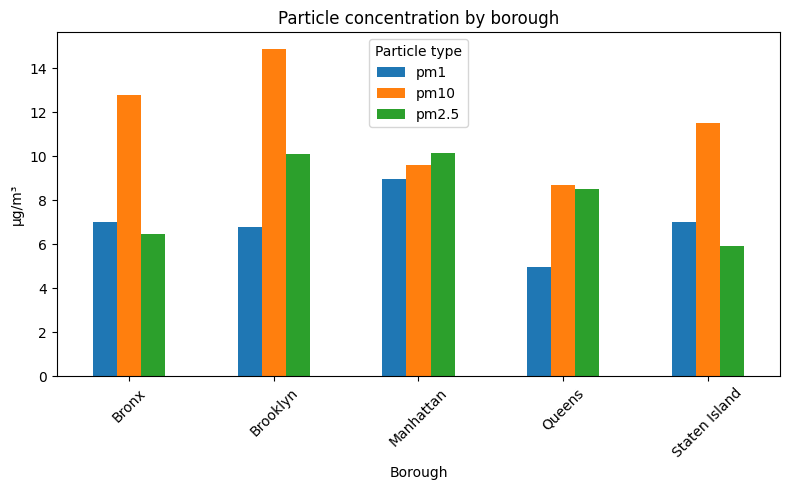

In [19]:
#============================ 📊 VISUALIZATION 📊 ========================

avg_by_borough.rename(columns={"pm25": "pm2.5"}, inplace=True)
# Crear gráfico
avg_by_borough.plot(x='borough', y=['pm1', 'pm10', 'pm2.5'], kind='bar', figsize=(8,5))
plt.title('Particle concentration by borough')
plt.xlabel('Borough')
plt.ylabel('µg/m³')
plt.legend(title='Particle type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 🌫️ Pollutant Severity Scoring

To assess the severity of each pollutant, we defined a **custom scoring system** based on their potential health impact.  
The highest score was assigned to **PM1**, as its extremely small particle size allows it to penetrate deep into the lungs and even enter the bloodstream.  
Next in severity is **PM2.5**, which also poses significant respiratory risks.  
Other pollutants received lower scores since they are considered less harmful to human health.  

Based on this scoring system, we computed an overall **pollution score** for each borough and visualized the results to compare air quality across the city.

         borough    EQS  Category
2         QUEENS  70.17      Good
3          BRONX  61.36      Good
4  STATEN ISLAND  58.72  Moderate
1       BROOKLYN  34.23      Poor
0      MANHATTAN   8.47      Poor


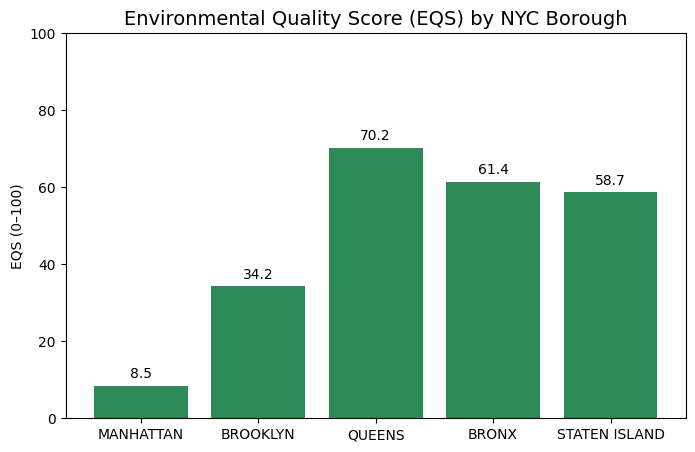

In [33]:
#from sklearn.preprocessing import MinMaxScaler
merged_df = pd.merge(noise_ny_df, traffic_mean_df, on="borough")
merged_df = pd.merge(merged_df, tree_ny_df, on="borough")
merged_df = pd.merge(merged_df, avg_by_borough, on="borough")

# --- 1. Sample data (replace this with your actual dataset) ---
#data = {
#    "Borough": ["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island"],
#    "Noise_Complaints": [8200, 5000, 4000, 7000, 2000],
#    "Traffic_Volume": [1200000, 1000000, 900000, 950000, 300000],
#    "Tree_Count": [45000, 70000, 85000, 55000, 90000]
#}

#df = pd.DataFrame(data)
merged_df

from sklearn.preprocessing import MinMaxScaler


# --- 1. Normalize the data (Min-Max 0–1) ---
scaler = MinMaxScaler()

# We'll normalize each column separately, making sure that "more trees" = better,
# but "more noise" and "more traffic" = worse.
merged_df["Noise_Norm"] = 1 - scaler.fit_transform(merged_df[["noise_count"]])
merged_df["Traffic_Norm"] = 1 - scaler.fit_transform(merged_df[["traffic_volume"]])
merged_df["Tree_Norm"] = scaler.fit_transform(merged_df[["tree_count"]])
merged_df["pm1_Norm"] = 1 - scaler.fit_transform(merged_df[["pm1"]])
merged_df["pm2.5_Norm"] = 1 - scaler.fit_transform(merged_df[["pm2.5"]])
merged_df["pm10_Norm"] = 1 - scaler.fit_transform(merged_df[["pm10"]])

# --- 2. Compute the Environmental Quality Score (EQS) ---
# Weights can be adjusted — here: 0.1 Noise, 0.15 Traffic, 0.15 Trees, 0.3 PM1, 0.2 PM2.5, 0.1 PM10
merged_df["EQS"] = 100 * (
    0.1 * merged_df["Noise_Norm"] +
    0.15 * merged_df["Traffic_Norm"] +
    0.15 * merged_df["Tree_Norm"] +
    0.3 * merged_df["pm1_Norm"] +
    0.2 * merged_df["pm2.5_Norm"] +
    0.1 * merged_df["pm10_Norm"]
)

merged_df["EQS"] = merged_df["EQS"].round(2)

# --- 3. Categorize Boroughs based on EQS ---
def classify(score):
    if score >= 80:
        return "Excellent"
    elif score >= 60:
        return "Good"
    elif score >= 40:
        return "Moderate"
    else:
        return "Poor"


merged_df["Category"] = merged_df["EQS"].apply(classify)

# --- 4. Display results ---
print(merged_df[["borough", "EQS", "Category"]].sort_values("EQS", ascending=False))

# --- 5. Visualization ---
plt.figure(figsize=(8, 5))
plt.bar(merged_df["borough"], merged_df["EQS"], color="seagreen")
plt.title("Environmental Quality Score (EQS) by NYC Borough", fontsize=14)
plt.ylabel("EQS (0–100)")
plt.ylim(0, 100)
for i, val in enumerate(merged_df["EQS"]):
    plt.text(i, val + 2, f"{val:.1f}", ha="center", fontsize=10)
plt.show()
